###**Import Libraries**

In [1]:
import pandas as pd
import numpy as np

#untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#untuk data processing 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

#untuk membuang warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**Import Data**

In [2]:
kabupatenkota = pd.read_excel('dataset_model.xlsx').set_index('nama_kabupaten_kota')
kabupatenkota

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan
nama_kabupaten_kota,,,,,,,
Kepulauan Seribu,29230,68.76,0.2240,0.1031,0.096701,0.0273,7
Jakarta Selatan,2367002,74.12,0.3175,0.1368,0.163100,0.0568,134
Jakarta Timur,3234003,74.47,0.3326,0.1334,0.152697,0.0441,139
Jakarta Pusat,1153399,74.11,0.4122,0.1843,0.233388,0.0599,80
Jakarta Barat,2569462,73.62,0.3412,0.1255,0.164697,0.0401,104
...,...,...,...,...,...,...,...
Puncak,115323,65.74,0.0973,0.0581,0.066067,0.0037,0
Dogiyai,99277,65.73,0.1462,0.0340,0.054971,0.0115,1
Intan Jaya,50599,65.60,0.0705,0.0601,0.059206,0.0353,1


###**Data Preprocessing**

####Check and Fix Data Type for Each Column

In [3]:
kabupatenkota.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, Kepulauan Seribu to Kota Jayapura
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jumlah_penduduk               514 non-null    int64  
 1   umur_harapan_hidup            514 non-null    float64
 2   persentase_keluhan_kesehatan  514 non-null    float64
 3   persentase_menderita_sakit    514 non-null    float64
 4   persentase_berobat_jalan      514 non-null    float64
 5   persentase_rawat_inap         514 non-null    float64
 6   jumlah_fasilitas_kesehatan    514 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 32.1+ KB


####Check Duplicated and Null Entries

In [4]:
kabupatenkota.duplicated().sum()

0

In [5]:
kabupatenkota.isnull().sum()

jumlah_penduduk                 0
umur_harapan_hidup              0
persentase_keluhan_kesehatan    0
persentase_menderita_sakit      0
persentase_berobat_jalan        0
persentase_rawat_inap           0
jumlah_fasilitas_kesehatan      0
dtype: int64

=================================================================================================================== <br>
Tidak ada data yang terduplikasi dan data kosong.
=================================================================================================================== <br>

####Visualization of Raw Data

####Data Descriptive Statistics Summary

In [6]:
kabupatenkota.describe()

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan
count,5.140000e+02,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,5.283095e+05,69.534047,0.284564,0.136509,0.127601,0.047800,21.632296
std,6.524835e+05,3.468444,0.082796,0.042707,0.048926,0.018959,19.482061
min,1.402100e+04,55.270000,0.002300,0.000600,0.000554,0.000000,0.000000
25%,1.530330e+05,67.217500,0.229225,0.103400,0.090263,0.035900,11.000000
50%,2.798570e+05,69.870000,0.286500,0.135099,0.126064,0.047100,18.000000
75%,6.455332e+05,71.862500,0.337850,0.167725,0.159021,0.059850,27.000000
max,6.088233e+06,77.650000,0.572500,0.273900,0.276433,0.109000,139.000000


###**Outlier**

####Check Outliers Using Box Plot

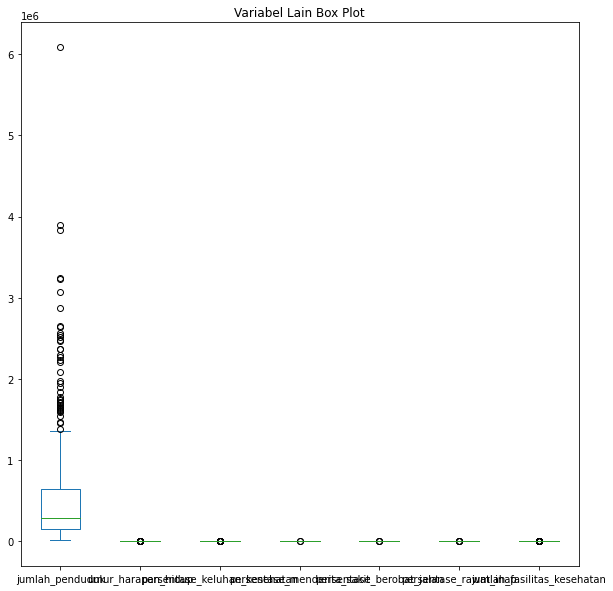

In [7]:
kabupatenkota[['jumlah_penduduk','umur_harapan_hidup','persentase_keluhan_kesehatan', 'persentase_menderita_sakit', 'persentase_berobat_jalan', 'persentase_rawat_inap', 'jumlah_fasilitas_kesehatan']].plot(figsize = (10,10), kind = 'box', title = 'Variabel Lain Box Plot')
plt.show()

In [8]:
Q1 = kabupatenkota.quantile(0.25)
Q3 = kabupatenkota.quantile(0.75)
IQR = Q3 - Q1

print("Kabupaten/Kota yang Memiliki Nilai Outlier:")
print(kabupatenkota[((kabupatenkota < (Q1 - 1.5 * IQR)) |(kabupatenkota > (Q3 + 1.5 * IQR))).any(axis=1)])
print('\n')
kabupatenkota= kabupatenkota[~((kabupatenkota< (Q1 - 1.5 * IQR)) |(kabupatenkota> (Q3 + 1.5 * IQR))).any(axis=1)]
print("Kabupaten/Kota Shape Setelah Membuang Ouliers:", kabupatenkota.shape)

Kabupaten/Kota yang Memiliki Nilai Outlier:
                     jumlah_penduduk  umur_harapan_hidup  \
nama_kabupaten_kota                                        
Jakarta Selatan              2367002               74.12   
Jakarta Timur                3234003               74.47   
Jakarta Pusat                1153399               74.11   
Jakarta Barat                2569462               73.62   
Jakarta Utara                1843537               73.28   
...                              ...                 ...   
Asmat                          98885               58.05   
Mamberamo Raya                 24773               57.77   
Nduga                          99817               55.27   
Lanny Jaya                    180305               66.06   
Deiyai                         74529               65.24   

                     persentase_keluhan_kesehatan  persentase_menderita_sakit  \
nama_kabupaten_kota                                                             
Jakarta Selat

####Data Descriptive Statistic Summary After Removing Outliers

In [9]:
kabupatenkota.describe()

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan
count,4.470000e+02,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,3.762731e+05,69.490157,0.279758,0.134845,0.124545,0.047294,17.856823
std,3.209719e+05,3.209683,0.076835,0.040551,0.047441,0.018232,11.164369
min,2.118800e+04,60.640000,0.070500,0.022800,0.020254,0.002200,0.000000
25%,1.484730e+05,67.210000,0.225150,0.103150,0.087733,0.035050,10.500000
50%,2.577850e+05,69.510000,0.278300,0.133500,0.122006,0.046700,17.000000
75%,4.569155e+05,71.525000,0.333200,0.165450,0.157680,0.058950,25.000000
max,1.350438e+06,77.650000,0.475700,0.255200,0.261457,0.095000,51.000000


###**Data Processing**

####Standardizes Data with Standard Scaler
StandardScaler mentransformasi data sehingga memiliki rata-rata 0 dan standar deviasi 1. Hal ini dilakukan untuk menghindari bias sehingga tiap data memiliki skala dan satuan yang sebanding. Penggunaan metode K-Means Clustering disarankan untuk menggunakan StandardScaler karena K-Means sensitif terhadap nilai varians.

In [10]:
scaler = StandardScaler()
df_kabupatenkota = scaler.fit_transform(kabupatenkota)
df_kk = pd.DataFrame(df_kabupatenkota, columns = list(kabupatenkota.columns), index = list(kabupatenkota.index))
df_kk.head()

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan
Kepulauan Seribu,-1.082437,-0.227740,-0.726504,-0.783712,-0.587572,-1.097877,-0.973543
Kab Pandeglang,2.795941,-1.506556,0.533454,1.154289,-0.025393,-1.092386,1.806259
Kota Cilegon,0.182847,-0.879625,-0.094571,-0.302298,1.402275,0.181507,-0.435516
Kota Serang,0.985076,-0.464789,0.963429,1.080225,0.641757,-0.098529,0.102510
KABUPATEN CIAMIS,2.574484,0.729812,1.072877,1.156757,1.070911,0.263871,2.075272


In [11]:
df_kk.describe()

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan
count,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02
mean,-2.648888e-16,2.772577e-15,-2.359534e-16,1.341209e-16,-9.095384e-16,-6.258975e-17,-1.343693e-16
std,1.001120e+00,1.001120e+00,1.001120e+00,1.001120e+00,1.001120e+00,1.001120e+00,1.001120e+00
min,-1.107521e+00,-2.760420e+00,-2.726539e+00,-2.766151e+00,-2.200792e+00,-2.476098e+00,-1.601240e+00
25%,-7.105150e-01,-7.111952e-01,-7.115197e-01,-7.824776e-01,-7.768157e-01,-6.723307e-01,-6.596939e-01
50%,-3.695677e-01,6.189282e-03,-1.899924e-02,-3.319964e-02,-5.356094e-02,-3.263843e-02,-7.683222e-02
75%,2.515260e-01,6.346805e-01,6.963230e-01,7.555790e-01,6.992351e-01,6.399994e-01,6.405360e-01
max,3.038448e+00,2.545107e+00,2.553034e+00,2.971319e+00,2.889190e+00,2.619476e+00,2.971983e+00


In [12]:
df_kk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447 entries, Kepulauan Seribu to Kota Jayapura
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jumlah_penduduk               447 non-null    float64
 1   umur_harapan_hidup            447 non-null    float64
 2   persentase_keluhan_kesehatan  447 non-null    float64
 3   persentase_menderita_sakit    447 non-null    float64
 4   persentase_berobat_jalan      447 non-null    float64
 5   persentase_rawat_inap         447 non-null    float64
 6   jumlah_fasilitas_kesehatan    447 non-null    float64
dtypes: float64(7)
memory usage: 27.9+ KB


#### Elbow Analysis
Elbow Analysis adalah salah satu cara yang dapat digunakan untuk menentukan nilai k (jumlah kluster) yang akan digunakan.

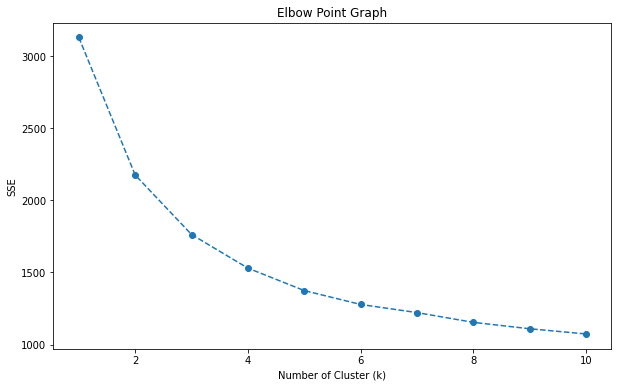

In [13]:
SSE = [] #menyimpan nilai Sum of Squared Error
for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_kabupatenkota)
  SSE.append(kmeans.inertia_) 
   
plt.figure(figsize = (10,6))
plt.plot(range(1,11), SSE, marker = 'o', linestyle = '--') 
plt.xlabel('Number of Cluster (k)') 
plt.ylabel('SSE') 
plt.title('Elbow Point Graph')
plt.show()

=================================================================================================================== <br>
Berdasarkan grafik Elbow Analysis di atas, hipotesis sementara untuk jumlah kluster yang optimal untuk dipilih dimana kurva mulai bengkok dan melandai adalah di nilai k = 4. Untuk lebih jelasnya akan digunakan metode Silhouette Analysis.
=================================================================================================================== <br>

#### Silhouette Analysis
Silhouette Analysis adalah cara lain yang dapat digunakan untuk menentukan nilai k (jumlah kluster) yang akan digunakan.

In [14]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters, random_state = 0)
    preds = clusterer.fit_predict(df_kabupatenkota)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_kabupatenkota, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.254446083838104)
For n_clusters = 3, silhouette score is 0.24406209321859648)
For n_clusters = 4, silhouette score is 0.2124132173519724)
For n_clusters = 5, silhouette score is 0.2108694398076752)
For n_clusters = 6, silhouette score is 0.19256072566388435)
For n_clusters = 7, silhouette score is 0.19006635424611873)
For n_clusters = 8, silhouette score is 0.1809766938368726)
For n_clusters = 9, silhouette score is 0.16164390490567318)
For n_clusters = 10, silhouette score is 0.15053908101580413)


=================================================================================================================== <br>
Berdasarkan tabel di atas, hipotesis sementara dari Elbow Analysis untuk nilai k = 4 memang memiliki nilai silhouette score yang terhitung tinggi, namun memang bukan yang tertinggi. k = 2 memiliki nilai silhouette score tertinggi tapi akan diabaikan karena kurang relevan dengan masalah pengelompokkan. Maka dari itu akan kami clustering untuk ketiga silhouette score tertinggi yaitu k = 3, k = 4, dan k = 5.
=================================================================================================================== <br>

###**Data Clustering dan Labeling**

###Clustering k = 3

In [15]:
km_3 = KMeans(n_clusters = 3, random_state = 0)
model_3 = km_3.fit(df_kabupatenkota)
kabupatenkota['Cluster_k_3'] = model_3.labels_
df_kk['Cluster_k_3'] = model_3.labels_
kabupatenkota.head()

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan,Cluster_k_3
nama_kabupaten_kota,,,,,,,,
Kepulauan Seribu,29230,68.76,0.2240,0.1031,0.096701,0.0273,7,0
Kab Pandeglang,1272687,64.66,0.3207,0.1816,0.123341,0.0274,38,2
Kota Cilegon,434896,66.67,0.2725,0.1226,0.190995,0.0506,13,1
Kota Serang,692101,68.00,0.3537,0.1786,0.154956,0.0455,19,1
KABUPATEN CIAMIS,1201685,71.83,0.3621,0.1817,0.175293,0.0521,41,2


In [16]:
print('Centroids:', km_3.cluster_centers_.tolist())

Centroids: [[-0.37915823632057655, -0.3446797397846874, -0.8489957060540138, -0.7972644466356573, -0.8880013889479931, -0.70640139335964, -0.2939047168389421], [-0.37326833253090796, -0.11119777449359264, 0.546188013936399, 0.5770924581833756, 0.5230805430424859, 0.4203776962745024, -0.2636055844197825], [1.6499701859609612, 1.0024480670354143, 0.6807973937999539, 0.49934528678475204, 0.8171888661059339, 0.6407601440858931, 1.2228575176085184]]


In [17]:
df_analysis_3 = pd.concat([(kabupatenkota.groupby(['Cluster_k_3']).mean()), (df_kk.groupby(['Cluster_k_3']).mean())], axis = 1)
df_analysis_3

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan
Cluster_k_3,,,,,,,,,,,,,,
0,254710.163934,68.385082,0.214599,0.102551,0.082464,0.034430,14.579235,-0.379158,-0.344680,-0.848996,-0.797264,-0.888001,-0.706401,-0.293905
1,256598.541436,69.133646,0.321677,0.158220,0.149332,0.054950,14.917127,-0.373268,-0.111198,0.546188,0.577092,0.523081,0.420378,-0.263606
2,905274.349398,72.704096,0.332008,0.155071,0.163269,0.058964,31.493976,1.649970,1.002448,0.680797,0.499345,0.817189,0.640760,1.222858


In [18]:
for i in range (3):
  KabupatendanKota = list(kabupatenkota.index.where(kabupatenkota['Cluster_k_3'] == i).dropna())
  print("Kabupaten/Kota in cluster {} is {}".format(i, KabupatendanKota))
  print("There are {} Kabupaten dan Kota in cluster {}".format(len(KabupatendanKota), i))

Kabupaten/Kota in cluster 0 is ['Kepulauan Seribu', 'Kabupaten Bangkalan', 'Kabupaten Sumenep', 'KABUPATEN BADUNG', 'KABUPATEN KLUNGKUNG', 'KOTA DENPASAR', 'SIMEULUE', 'ACEH SINGKIL', 'ACEH BESAR', 'ACEH UTARA', 'NAGAN RAYA', 'SABANG', 'SUBULUSSALAM', 'Nias', 'Mandailing Natal', 'Tapanuli Selatan', 'Tapanuli Tengah', 'Tapanuli Utara', 'Toba Samosir', 'Labuhan Batu', 'Asahan', 'Simalungun', 'Dairi', 'Nias Selatan', 'Humbang Hasundutan', 'Pakpak Bharat', 'Samosir', 'Padang Lawas Utara', 'Padang Lawas', 'Labuhanbatu Selatan', 'Nias Utara', 'Nias Barat', 'Binjai', 'Kab. Kepulauan Mentawai', 'Kab. Pasaman', 'Kuantan Singingi', 'Indragiri Hulu', 'Indragiri Hilir', 'Pelalawan', 'Siak', 'Rokan Hulu', 'Bengkalis', 'Rokan Hilir', 'Kepulauan Meranti', 'Karimun', 'Bintan', 'Natuna', 'Kepulauan Anambas', 'Tanjungpinang', 'Kerinci', 'Merangin', 'Sarolangun', 'Batang Hari', 'Muaro Jambi', 'TanjabTimur', 'Tanjab Barat', 'Tebo', 'Bungo', 'Ogan Komering Ilir', 'Muara Enim', 'Musi Rawas', 'Musi Banyuasin

####Clustering k = 4

In [19]:
km_4 = KMeans(n_clusters = 4, random_state = 0)
model_4 = km_4.fit(df_kabupatenkota)
kabupatenkota['Cluster_k_4'] = model_4.labels_
df_kk['Cluster_k_4'] = model_4.labels_
kabupatenkota.head()

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan,Cluster_k_3,Cluster_k_4
nama_kabupaten_kota,,,,,,,,,
Kepulauan Seribu,29230,68.76,0.2240,0.1031,0.096701,0.0273,7,0,1
Kab Pandeglang,1272687,64.66,0.3207,0.1816,0.123341,0.0274,38,2,3
Kota Cilegon,434896,66.67,0.2725,0.1226,0.190995,0.0506,13,1,0
Kota Serang,692101,68.00,0.3537,0.1786,0.154956,0.0455,19,1,0
KABUPATEN CIAMIS,1201685,71.83,0.3621,0.1817,0.175293,0.0521,41,2,3


In [20]:
df_analysis_4 = pd.concat([(kabupatenkota.groupby(['Cluster_k_4']).mean()), (df_kk.groupby(['Cluster_k_4']).mean())], axis = 1)
df_analysis_4

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan,Cluster_k_3,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan,Cluster_k_3
Cluster_k_4,,,,,,,,,,,,,,,,
0,256371.340136,68.732993,0.334656,0.165710,0.154907,0.054428,14.700680,1.000000,-0.373977,-0.236164,0.715300,0.761988,0.640732,0.391694,-0.283015,1.000000
1,155167.171429,66.873238,0.199152,0.101781,0.073394,0.027675,9.780952,0.019048,-0.689636,-0.816233,-1.050257,-0.816277,-1.079397,-1.077273,-0.724172,0.019048
2,407095.725191,70.751145,0.246609,0.110846,0.106672,0.048374,21.137405,0.534351,0.096137,0.393310,-0.431917,-0.592484,-0.377156,0.059282,0.294173,0.534351
3,951334.171875,72.941563,0.353759,0.167320,0.175306,0.060888,31.640625,2.000000,1.793632,1.076515,0.964202,0.801753,1.071195,0.746386,1.236008,2.000000


In [21]:
print('Centroids:', km_4.cluster_centers_.tolist())

Centroids: [[-0.37397697992734036, -0.2361640352902476, 0.7153000136411526, 0.7619884754562951, 0.6407321922439281, 0.391693945694467, -0.28301459180063465], [-0.6896356954951636, -0.8162333680534395, -1.0502569648395594, -0.8162765410766398, -1.0793970621874625, -1.0772730049335382, -0.7241716570806563], [0.09613671596852526, 0.3933102382174116, -0.43191656539692236, -0.5924844815872767, -0.3771560379304412, 0.05928210114723994, 0.29417310405904373], [1.7936320981942866, 1.0765152441687178, 0.9642023339047041, 0.8017530938891425, 1.0711953162299008, 0.7463859414163496, 1.2360076930691788]]


In [22]:
for i in range (4):
  KabupatendanKota = list(kabupatenkota.index.where(kabupatenkota['Cluster_k_4'] == i).dropna())
  print("Kabupaten/Kota in cluster {} is {}".format(i, KabupatendanKota))
  print("There are {} Kabupaten dan Kota in cluster {}".format(len(KabupatendanKota), i))

Kabupaten/Kota in cluster 0 is ['Kota Cilegon', 'Kota Serang', 'KOTA SUKABUMI', 'KOTA BANJAR', 'Kota Magelang', 'Kota Salatiga', 'Kota Tegal', 'Kota Kediri', 'Kota Blitar', 'Kota Probolinggo', 'Kota Pasuruan', 'Kota Madiun', 'Kota Batu', 'KABUPATEN BANGLI', 'KABUPATEN KARANGASEM', 'ACEH SELATAN', 'ACEH TENGGARA', 'ACEH TIMUR', 'ACEH TENGAH', 'ACEH BARAT', 'PIDIE', 'ACEH BARAT DAYA', 'GAYO LUES', 'ACEH TAMIANG', 'BENER MERIAH', 'PIDIE JAYA', 'BANDA ACEH', 'LANGSA', 'LHOKSEUMAWE', 'Mandailing Natal', 'Serdang Bedagai', 'Batu Bara', 'Labuanbatu Utara', 'Tanjungbalai', 'Padangsidimpuan', 'Gunungsitoli', 'Kab. Pesisir Selatan', 'Kab. Solok', 'Kab. Sijunjung', 'Kab. Tanah Datar', 'Kab. Padang Pariaman', 'Kab. Agam', 'Kab. Lima Puluh Kota', 'Kab. Solok Selatan', 'Kab. Dharmasraya', 'Kota Sawahlunto', 'Kota Padang Panjang', 'Kota Bukittinggi', 'Kota Payakumbuh', 'Kota Pariaman', 'Lingga', 'Ogan Komering Ulu', 'Lahat', 'Ogan Komering Ulu Timur', 'Ogan Ilir', 'Pali', 'Prabumulih', 'Pagar Alam', 

####Clustering k = 5

In [23]:
km_5 = KMeans(n_clusters = 5, random_state = 0)
model_5 = km_5.fit(df_kabupatenkota)
kabupatenkota['Cluster_k_5'] = model_5.labels_
df_kk['Cluster_k_5'] = model_5.labels_
kabupatenkota.head()

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan,Cluster_k_3,Cluster_k_4,Cluster_k_5
nama_kabupaten_kota,,,,,,,,,,
Kepulauan Seribu,29230,68.76,0.2240,0.1031,0.096701,0.0273,7,0,1,1
Kab Pandeglang,1272687,64.66,0.3207,0.1816,0.123341,0.0274,38,2,3,0
Kota Cilegon,434896,66.67,0.2725,0.1226,0.190995,0.0506,13,1,0,2
Kota Serang,692101,68.00,0.3537,0.1786,0.154956,0.0455,19,1,0,2
KABUPATEN CIAMIS,1201685,71.83,0.3621,0.1817,0.175293,0.0521,41,2,3,0


In [24]:
df_analysis_5 = pd.concat([(kabupatenkota.groupby(['Cluster_k_5']).mean()), (df_kk.groupby(['Cluster_k_5']).mean())], axis = 1)
df_analysis_5

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan,Cluster_k_3,Cluster_k_4,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan,Cluster_k_3,Cluster_k_4
Cluster_k_5,,,,,,,,,,,,,,,,,,
0,1.043518e+06,72.761273,0.349938,0.169349,0.170743,0.059355,32.618182,2.000000,2.981818,2.081157,1.020282,0.914414,0.851839,0.974910,0.662213,1.323666,2.000000,2.981818
1,1.484884e+05,66.855612,0.194689,0.098796,0.073054,0.027461,9.857143,0.000000,1.000000,-0.710467,-0.821731,-1.108416,-0.889971,-1.086587,-1.089024,-0.717340,0.000000,1.000000
2,2.639543e+05,67.001220,0.338020,0.175078,0.142603,0.041960,13.719512,0.963415,0.085366,-0.350325,-0.776315,0.759119,0.993275,0.381081,-0.292921,-0.370997,0.963415,0.085366
3,2.698238e+05,70.985745,0.322987,0.149027,0.162733,0.067627,16.106383,1.117021,0.595745,-0.332018,0.466483,0.563255,0.350123,0.805879,1.116424,-0.156964,1.117021,0.595745
4,4.172966e+05,70.691695,0.242775,0.109445,0.102804,0.045655,21.889831,0.449153,1.983051,0.127954,0.374767,-0.481879,-0.627069,-0.458778,-0.090014,0.361644,0.449153,1.983051


In [25]:
print('Centroids:', km_5.cluster_centers_.tolist())

Centroids: [[2.0811573027182755, 1.0202817282314989, 0.9144139127221476, 0.8518393868087739, 0.9749095627194361, 0.6622126237669097, 1.3236662194337727], [-0.7104670140351756, -0.8217309818171906, -1.1084157276064575, -0.8899707835382893, -1.086586996859792, -1.0890243221827032, -0.7173395786360541], [-0.3503254565689594, -0.7763151578230254, 0.7591190310207496, 0.9932753666009637, 0.3810807524950365, -0.2929214565827424, -0.370996943460379], [-0.33201824426669896, 0.46648334474544345, 0.5632552365508465, 0.35012324067744743, 0.805878981537696, 1.116424341099498, -0.15696378280751982], [0.12795354343785054, 0.3747673703455085, -0.481879463337004, -0.6270694421414341, -0.4587775103936106, -0.09001389285460289, 0.36164391173842125]]


In [26]:
for i in range (5):
  KabupatendanKota = list(kabupatenkota.index.where(kabupatenkota['Cluster_k_5'] == i).dropna())
  print("Kabupaten/Kota in cluster {} is {}".format(i, KabupatendanKota))
  print("There are {} Kabupaten dan Kota in cluster {}".format(len(KabupatendanKota), i))

Kabupaten/Kota in cluster 0 is ['Kab Pandeglang', 'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN MAJALENGKA', 'KABUPATEN SUMEDANG', 'KABUPATEN PURWAKARTA', 'KOTA BOGOR', 'KOTA TASIKMALAYA', 'Kabupaten Purbalingga', 'Kabupaten Banjarnegara', 'Kabupaten Kebumen', 'Kabupaten Purworejo', 'Kabupaten Wonosobo', 'Kabupaten Magelang', 'Kabupaten Boyolali', 'Kabupaten Klaten', 'Kabupaten Wonogiri', 'Kabupaten Karanganyar', 'Kabupaten Sragen', 'Kabupaten Blora', 'Kabupaten Pati', 'Kabupaten Kudus', 'Kabupaten Jepara', 'Kabupaten Demak', 'Kabupaten Semarang', 'Kabupaten Temanggung', 'Kabupaten Kendal', 'Kabupaten Batang', 'Kabupaten Pekalongan', 'Bantul', 'Gunungkidul', 'Sleman', 'Kabupaten Ponorogo', 'Kabupaten Trenggalek', 'Kabupaten Tulungagung', 'Kabupaten Blitar', 'Kabupaten Lumajang', 'Kabupaten Bondowoso', 'Kabupaten Probolinggo', 'Kabupaten Mojokerto', 'Kabupaten Nganjuk', 'Kabupaten Ngawi', 'Kabupaten Bojonegoro', 'Kabupaten Tuban', 'Kabupaten Lamongan', 'Kabupaten Gresik', 'Kabupa

###**Evaluation Measures Using Davies-Bouldin (DB) Index**

DB Index merupakan metrik yang mengukur rata-rata kesamaan antara setiap kluster dan yang paling mirip. Nilai DB Index yang lebih rendah mengindikasikan jumlah kluster yang lebih optimal untuk digunakan.

In [27]:
for i in range (3, 6):
    col = 'Cluster_k_' + str(i)
    db_index = davies_bouldin_score(df_kk, df_kk[col])
    print('Davies-Bouldin Index for k = {} is {}'.format(i, db_index))

Davies-Bouldin Index for k = 3 is 1.3922324921585876
Davies-Bouldin Index for k = 4 is 1.0073702814138519
Davies-Bouldin Index for k = 5 is 1.2365823838125756


####**Results**

In [28]:
kabupatenkota.drop(columns = ['Cluster_k_3', 'Cluster_k_5'], inplace = True)
kabupatenkota['Cluster_k_4'] = kabupatenkota['Cluster_k_4'].map({0 : 'Cluster 0' , 1 : 'Cluster 1', 2 : 'Cluster 2', 3 : 'Cluster 3'})
kabupatenkota

,jumlah_penduduk,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,jumlah_fasilitas_kesehatan,Cluster_k_4
nama_kabupaten_kota,,,,,,,,
Kepulauan Seribu,29230,68.76,0.2240,0.1031,0.096701,0.0273,7,Cluster 1
Kab Pandeglang,1272687,64.66,0.3207,0.1816,0.123341,0.0274,38,Cluster 3
Kota Cilegon,434896,66.67,0.2725,0.1226,0.190995,0.0506,13,Cluster 0
Kota Serang,692101,68.00,0.3537,0.1786,0.154956,0.0455,19,Cluster 0
KABUPATEN CIAMIS,1201685,71.83,0.3621,0.1817,0.175293,0.0521,41,Cluster 3
...,...,...,...,...,...,...,...,...
Yalimo,63789,65.42,0.0896,0.0228,0.026907,0.0041,0,Cluster 1
Puncak,115323,65.74,0.0973,0.0581,0.066067,0.0037,0,Cluster 1
Dogiyai,99277,65.73,0.1462,0.0340,0.054971,0.0115,1,Cluster 1


In [29]:
for clus in ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']:
  print("Kabupaten/Kota yang dikategorikan sebagai {} adalah :".format(clus))
  print(list(kabupatenkota[kabupatenkota['Cluster_k_4'] == clus].index), '\n')

Kabupaten/Kota yang dikategorikan sebagai Cluster 0 adalah :
['Kota Cilegon', 'Kota Serang', 'KOTA SUKABUMI', 'KOTA BANJAR', 'Kota Magelang', 'Kota Salatiga', 'Kota Tegal', 'Kota Kediri', 'Kota Blitar', 'Kota Probolinggo', 'Kota Pasuruan', 'Kota Madiun', 'Kota Batu', 'KABUPATEN BANGLI', 'KABUPATEN KARANGASEM', 'ACEH SELATAN', 'ACEH TENGGARA', 'ACEH TIMUR', 'ACEH TENGAH', 'ACEH BARAT', 'PIDIE', 'ACEH BARAT DAYA', 'GAYO LUES', 'ACEH TAMIANG', 'BENER MERIAH', 'PIDIE JAYA', 'BANDA ACEH', 'LANGSA', 'LHOKSEUMAWE', 'Mandailing Natal', 'Serdang Bedagai', 'Batu Bara', 'Labuanbatu Utara', 'Tanjungbalai', 'Padangsidimpuan', 'Gunungsitoli', 'Kab. Pesisir Selatan', 'Kab. Solok', 'Kab. Sijunjung', 'Kab. Tanah Datar', 'Kab. Padang Pariaman', 'Kab. Agam', 'Kab. Lima Puluh Kota', 'Kab. Solok Selatan', 'Kab. Dharmasraya', 'Kota Sawahlunto', 'Kota Padang Panjang', 'Kota Bukittinggi', 'Kota Payakumbuh', 'Kota Pariaman', 'Lingga', 'Ogan Komering Ulu', 'Lahat', 'Ogan Komering Ulu Timur', 'Ogan Ilir', 'Pali'

In [30]:
!pip install nbconvert

In [31]:
!jupyter nbconvert --to html MVA.ipynb

[NbConvertApp] WARNING | pattern 'MVA.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute